<a href="https://colab.research.google.com/github/shrutin0492/Deep-Learning-and-Computer-Vision-Lab/blob/main/moi_CNN_exp2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN model w/o regularization

##Importing necessary libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

##Generate synthetic data

In [ ]:
x, y = make_classification(n_samples=10000, n_features=100, n_informative=5, n_redundant=15, random_state=1)

##Split data into training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=42)

##Function to build CNN model without regularization

In [ ]:
def build_model():
    model = Sequential()
    model.add(Conv1D(64, 2, activation='relu', input_shape=(100, 1), use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

##Build and train the model w/o regularization

In [ ]:
model = build_model()
history = model.fit(x_train.reshape(-1, 100, 1), y_train, epochs=50, validation_data=(x_test.reshape(-1, 100, 1), y_test), verbose=0)

##Evaluate model

In [ ]:
loss, accuracy = model.evaluate(x_test.reshape(-1, 100, 1), y_test)
print('Without Regularization - Accuracy:', accuracy)

79/79 [==============================] - 0s 3ms/step - loss: 0.2863 - accuracy: 0.8948
Without Regularization - Accuracy: 0.8948000073432922


##Plot loss and accuracy curves

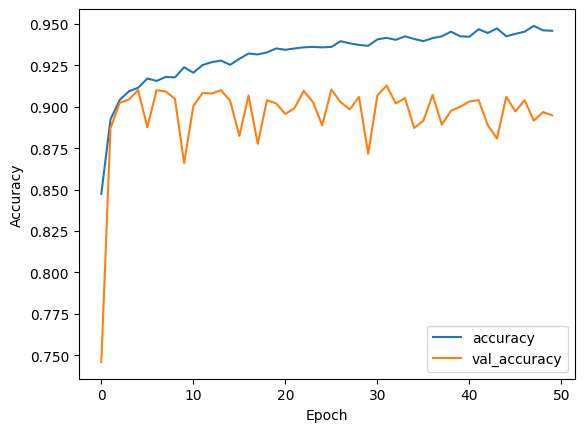

In [ ]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(history)

^ overfitting

# Build CNN model with dropout regularization

##Function to build CNN model with dropout regularization

In [ ]:
def build_model_with_dropout():
    model = Sequential()
    model.add(Conv1D(64, 2, activation='relu', input_shape=(100, 1), use_bias=False))
    model.add(Dropout(0.5))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

##Build and train the model

In [ ]:
model_dropout = build_model_with_dropout()
history_dropout = model_dropout.fit(x_train.reshape(-1, 100, 1), y_train, epochs=50, validation_data=(x_test.reshape(-1, 100, 1), y_test), verbose=0)

##Evaluate the model

In [ ]:
loss_dropout, accuracy_dropout = model_dropout.evaluate(x_test.reshape(-1, 100, 1), y_test)
print('With Dropout Regularization - Accuracy:', accuracy_dropout)

79/79 [==============================] - 0s 3ms/step - loss: 0.2372 - accuracy: 0.9112
With Dropout Regularization - Accuracy: 0.9111999869346619


##Plot loss and accuracy curves

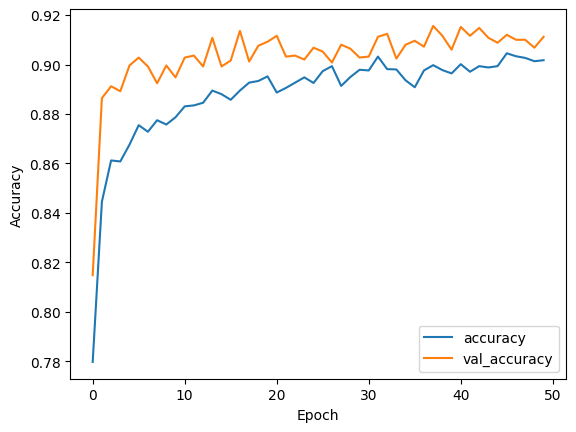

In [ ]:
plot_learning_curve(history_dropout)

# CNN model with L1 and L2 Regularization

##Function to build the model

In [ ]:
def build_model_with_l1_l2():
    model = Sequential()
    model.add(Conv1D(64, 2, activation='relu', input_shape=(100, 1), kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01), use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.01, l2=0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

##Build and train the model

In [ ]:
model_l1_l2 = build_model_with_l1_l2()
history_l1_l2 = model_l1_l2.fit(x_train.reshape(-1, 100, 1), y_train, epochs=50, validation_data=(x_test.reshape(-1, 100, 1), y_test), verbose=0)

##Evaluate the model

In [ ]:
loss_l1_l2, accuracy_l1_l2 = model_l1_l2.evaluate(x_test.reshape(-1, 100, 1), y_test)
print('With L1 and L2 Regularization - Accuracy:', accuracy_l1_l2)

79/79 [==============================] - 0s 3ms/step - loss: 0.2896 - accuracy: 0.9048
With L1 and L2 Regularization - Accuracy: 0.9047999978065491


##Plot loss and accuracy curves

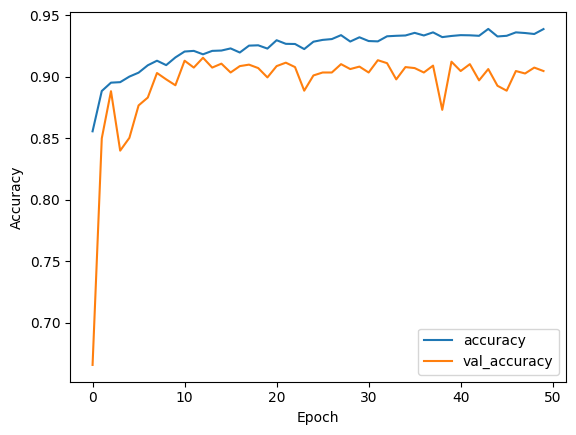

In [ ]:
plot_learning_curve(history_l1_l2)

# CNN Model with Early Stopping

##Function to build the model

In [ ]:
def build_model_with_early_stopping():
    model = Sequential()
    model.add(Conv1D(64, 2, activation='relu', input_shape=(100, 1), use_bias=False))
    model.add(BatchNormalization())
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

##Build and train the model

In [ ]:
model_early_stopping = build_model_with_early_stopping()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history_early_stopping = model_early_stopping.fit(x_train.reshape(-1, 100, 1), y_train, epochs=50, validation_data=(x_test.reshape(-1, 100, 1), y_test), callbacks=[early_stopping], verbose=0)

##Evaluate the model

In [ ]:
loss_early_stopping, accuracy_early_stopping = model_early_stopping.evaluate(x_test.reshape(-1, 100, 1), y_test)
print('With Early Stopping - Accuracy:', accuracy_early_stopping)

79/79 [==============================] - 0s 3ms/step - loss: 0.2512 - accuracy: 0.9028
With Early Stopping - Accuracy: 0.9028000235557556


##Loss and accuracy curves

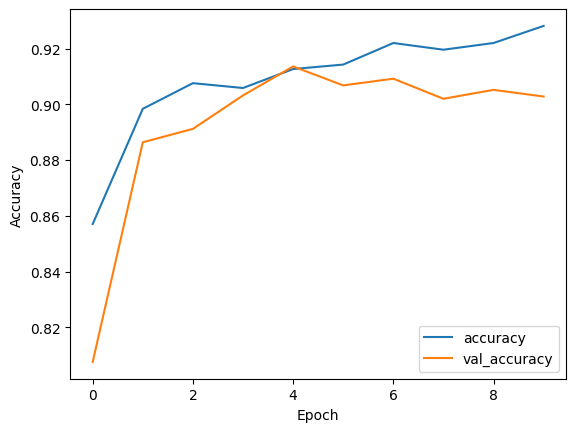

In [ ]:
plot_learning_curve(history_early_stopping)

how the model is trained - variety of data

reduce complexity by dropping neurons - simple applications - improve model performance

type of regularization technique - depends on the application

hidden layers

deep learning - automated

applications of all the libraries
less difference in accuracy - synthetic data. need to test on real time data to understand actual efficiency